In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree as trr
import cart

In [35]:
bike_train = pd.read_csv(r'test_data\bikeSpeedVsIq_train.txt', sep="\t", header=None)
bike_test = pd.read_csv(r'test_data\bikeSpeedVsIq_test.txt', sep="\t", header=None)
ex2_train = pd.read_csv(r'test_data\ex2.txt', sep="\t", header=None)
ex2_test = pd.read_csv(r'test_data\ex2test.txt', sep="\t", header=None)
exp_train = pd.read_csv(r'test_data\exp.txt', sep="\t", header=None)
exp_test = pd.read_csv(r'test_data\expTest.txt', sep="\t", header=None)

In [36]:
tree = cart.cart_tree([0], 1)
tree.train_tree(bike_train, 2000)
bike_test = tree.test_tree(bike_test)
cart_bike_error = round(mean_squared_error(bike_test[1], bike_test['estimated_1']), 1)
tree.train_tree(ex2_train, 2000)
ex2_test = tree.test_tree(ex2_test)
cart_ex2_error = round(mean_squared_error(ex2_test[1], ex2_test['estimated_1']), 1)
tree.train_tree(exp_train, 2000)
exp_test = tree.test_tree(exp_test)
cart_exp_error = round(mean_squared_error(exp_test[1], exp_test['estimated_1']), 1)

In [37]:
dtr = trr.DecisionTreeRegressor()
dtr = dtr.fit(bike_train[[0]], bike_train[[1]])
pred_dtr = dtr.predict(bike_test[[0]])
dtr_bike_error = round(mean_squared_error(bike_test[[1]], pred_dtr), 1)
dtr = dtr.fit(ex2_train[[0]], ex2_train[[1]])
pred_dtr = dtr.predict(ex2_test[[0]])
dtr_ex2_error = round(mean_squared_error(ex2_test[[1]], pred_dtr), 1)
dtr = dtr.fit(exp_train[[0]], exp_train[[1]])
pred_dtr = dtr.predict(exp_test[[0]])
dtr_exp_error = round(mean_squared_error(exp_test[[1]], pred_dtr), 1)

In [38]:
rfr = RandomForestRegressor()
rfr = rfr.fit(bike_train[[0]], bike_train[[1]])
pred_rfr = rfr.predict(bike_test[[0]])
rfr_bike_error = round(mean_squared_error(bike_test[[1]], pred_rfr), 1)
rfr = rfr.fit(ex2_train[[0]], ex2_train[[1]])
pred_rfr = rfr.predict(ex2_test[[0]])
rfr_ex2_error = round(mean_squared_error(ex2_test[[1]], pred_rfr), 1)
rfr = rfr.fit(exp_train[[0]], exp_train[[1]])
pred_rfr = rfr.predict(exp_test[[0]])
rfr_exp_error = round(mean_squared_error(exp_test[[1]], pred_rfr), 1)

c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\milos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


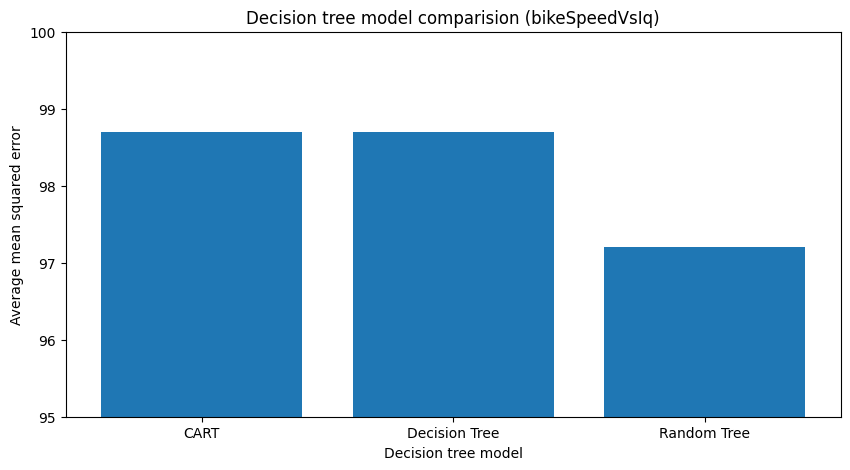

In [39]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['CART', 'Decision Tree', 'Random Forst'], [cart_bike_error, dtr_bike_error, rfr_bike_error])
plt.ylim(95, 100)
plt.xticks([0, 1, 2], ['CART', 'Decision Tree', 'Random Tree'])
plt.xlabel("Decision tree model")
plt.ylabel("Average mean squared error")
plt.title("Decision tree model comparision (bikeSpeedVsIq)")
plt.show()

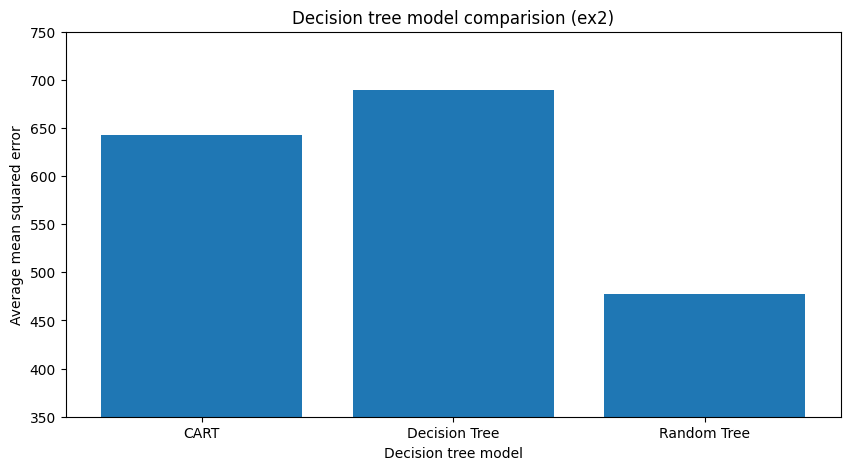

In [40]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['CART', 'Decision Tree', 'Random Forst'], [cart_ex2_error, dtr_ex2_error, rfr_ex2_error])
plt.ylim(350, 750)
plt.xticks([0, 1, 2], ['CART', 'Decision Tree', 'Random Tree'])
plt.xlabel("Decision tree model")
plt.ylabel("Average mean squared error")
plt.title("Decision tree model comparision (ex2)")
plt.show()

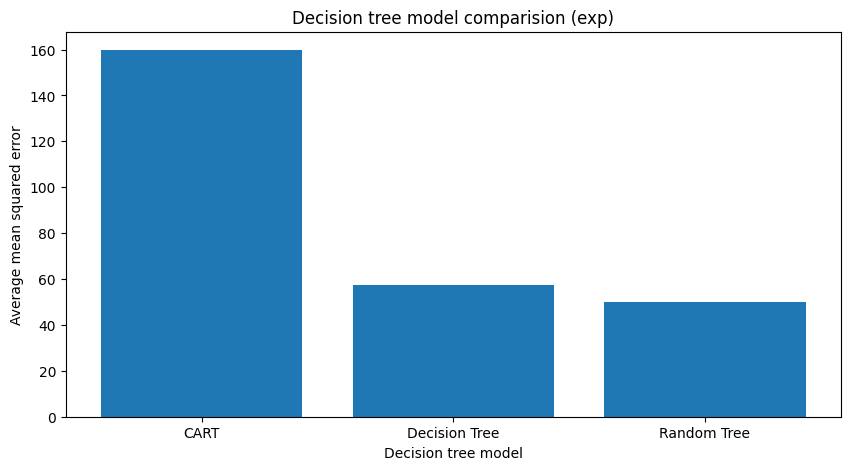

In [41]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['CART', 'Decision Tree', 'Random Forst'], [cart_exp_error, dtr_exp_error, rfr_exp_error])
plt.xticks([0, 1, 2], ['CART', 'Decision Tree', 'Random Tree'])
plt.xlabel("Decision tree model")
plt.ylabel("Average mean squared error")
plt.title("Decision tree model comparision (exp)")
plt.show()